In [1]:
import os
import joblib
import numpy as np
import pandas as pd

In [2]:
%precision 3
pd.options.display.precision = 3

In [3]:
from scipy import stats
import pingouin as pg

In [4]:
from GraphicSetting import *
import HelloDataScience as hds

In [5]:
os.getcwd()

'C:\\Users\\Administrator\\Documents\\PythonAdvanced-main\\live'

In [6]:
os.chdir(path = '../data')

In [7]:
os.listdir()

['GDP_Per_Capital_2021.csv',
 'KBO_Hitter_2021.z',
 'temp',
 'Used_Cars_Price.csv',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price.z',
 'Used_Cars_Price_Prep.z']

In [8]:
df = joblib.load(filename = 'Used_Cars_Price_Prep.z')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     1251 non-null   int64 
 1   Age       1251 non-null   int64 
 2   KM        1251 non-null   int64 
 3   FuelType  1251 non-null   object
 4   HP        1251 non-null   int64 
 5   MetColor  1251 non-null   object
 6   Doors     1251 non-null   int64 
 7   Weight    1251 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 78.3+ KB


In [10]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Doors,Weight
0,13500,23,46986,Diesel,90,1,3,1165
1,13750,23,72937,Diesel,90,1,3,1165
2,13950,24,41711,Diesel,90,1,3,1165
3,14950,26,48000,Diesel,90,0,3,1165
4,13750,30,38500,Diesel,90,0,3,1170


In [11]:
df.insert(loc = 1, column = 'const', value = 1)

In [12]:
df.head()

,Price,const,Age,KM,FuelType,HP,MetColor,Doors,Weight
0,13500,1,23,46986,Diesel,90,1,3,1165
1,13750,1,23,72937,Diesel,90,1,3,1165
2,13950,1,24,41711,Diesel,90,1,3,1165
3,14950,1,26,48000,Diesel,90,0,3,1165
4,13750,1,30,38500,Diesel,90,0,3,1170


In [13]:
df = pd.get_dummies(data = df, columns = ['FuelType'], drop_first = True)

In [14]:
df.head()

,Price,const,Age,KM,HP,MetColor,Doors,Weight,FuelType_Petrol
0,13500,1,23,46986,90,1,3,1165,0
1,13750,1,23,72937,90,1,3,1165,0
2,13950,1,24,41711,90,1,3,1165,0
3,14950,1,26,48000,90,0,3,1165,0
4,13750,1,30,38500,90,0,3,1170,0


In [15]:
df = df.rename(columns = {'FuelType_Petrol': 'Petrol'})

In [16]:
df.dtypes

Price        int64
const        int64
Age          int64
KM           int64
HP           int64
MetColor    object
Doors        int64
Weight       int64
Petrol       uint8
dtype: object

In [17]:
cols = ['MetColor']

In [18]:
df[cols] = df[cols].astype(np.uint8)

In [19]:
df.dtypes

Price       int64
const       int64
Age         int64
KM          int64
HP          int64
MetColor    uint8
Doors       int64
Weight      int64
Petrol      uint8
dtype: object

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
trSet, teSet = train_test_split(df, test_size = 0.3, random_state = 0)

In [22]:
trSet['Price'].mean()

9732.848

In [23]:
teSet['Price'].mean()

9625.545

In [24]:
yvar = 'Price'

In [25]:
trSetX = trSet.drop(columns = yvar)
trReal = trSet[yvar].copy()

In [26]:
teSetX = teSet.drop(columns = yvar)
teReal = teSet[yvar].copy()

In [27]:
import statsmodels.api as sa

In [28]:
def ols(y, X):
    model = sa.OLS(endog = y, exog = X)
    return model.fit()

In [29]:
fit1 = ols(y = trReal, X = trSetX)

In [30]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     339.3
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          2.57e-243
Time:                        15:28:01   Log-Likelihood:                -7326.4
No. Observations:                 875   AIC:                         1.467e+04
Df Residuals:                     867   BIC:                         1.471e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4832.6730   2260.499     -2.138      0.033   -9269.362    -395.984
Age          -94.4704      2.961    -31.902      0.000    -100.283     -88.658
KM            -0.0170      0.001    -12.892      0.000      -0.020      -0.014
HP             2.2961      4.971      0.462      0.644      -7.460      12.052
MetColor      14.4447     75.854      0.190      0.849    -134.434     163.324
Doors         -5.0942     46.181     -0.110      0.912     -95.733      85.545
Weight        18.9523      2.256      8.401      0.000      14.524      23.380
Petrol      1283.4546    325.808      3.939      0.000     643.990    1922.919
==============================================================================
Omnibus:                       54.450   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.503
Skew:                          -0.314   Prob(JB):                     3.09e-31
Kurtosis:                       4.860   Cond. No.                     5.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
hds.breushpagan(model = fit1)

,Statistic,P-Value,F-Value,F P-Value
0,62.997,3.794e-11,9.609,1.526e-11


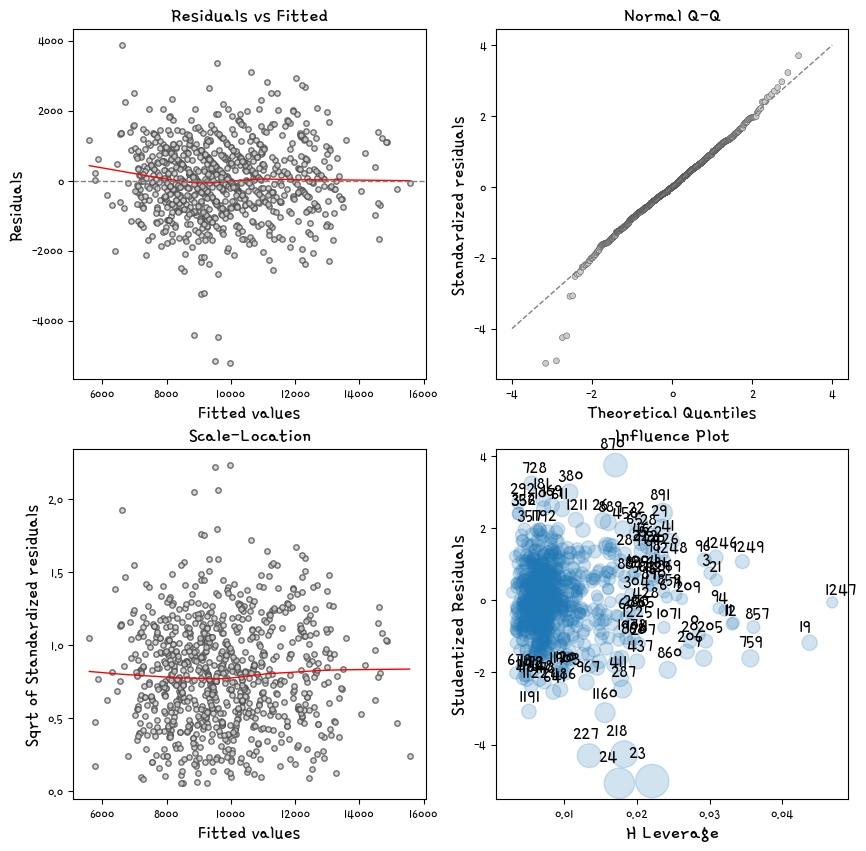

In [32]:
hds.regressionDiagnosis(model = fit1)

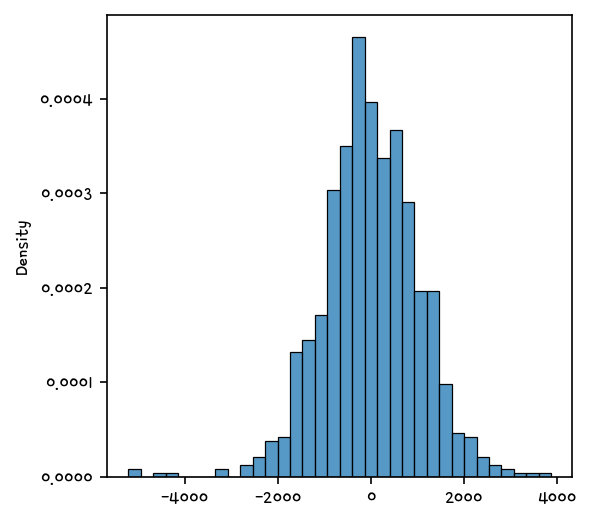

In [33]:
sns.histplot(x = fit1.resid, stat = 'density');

In [34]:
stats.shapiro(fit1.resid)

ShapiroResult(statistic=0.9833132028579712, pvalue=1.928031068132441e-08)

In [35]:
aug = hds.augment(model = fit1)

In [36]:
aug.head()

,Price,fitted,resid,hat,sigma,cooksd,std_resid
1116,9950,8212.688,1737.312,0.009,1051.128,3.099e-03,1.659
65,13950,12045.570,1904.430,0.020,1050.768,8.552e-03,1.828
412,9950,10436.103,-486.103,0.006,1052.669,1.544e-04,-0.463
1210,8950,9550.133,-600.133,0.006,1052.601,2.357e-04,-0.572
1219,8500,7485.488,1014.512,0.013,1052.228,1.528e-03,0.970


In [37]:
n = trSet.shape[0]
n

875

In [38]:
locs = aug['cooksd'].gt(4/n)
locs.sum()

57

In [39]:
trSetX = trSetX.loc[~locs]
trReal = trReal.loc[~locs]

In [40]:
trSetX.shape[0]

818

In [41]:
fit2 = ols(y = trReal, X = trSetX)

In [42]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     426.9
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          8.51e-267
Time:                        15:28:03   Log-Likelihood:                -6696.8
No. Observations:                 818   AIC:                         1.341e+04
Df Residuals:                     810   BIC:                         1.345e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3432.0746   2083.542     -1.647      0.100   -7521.853     657.704
Age          -95.4639      2.581    -36.992      0.000    -100.529     -90.398
KM            -0.0156      0.001    -13.317      0.000      -0.018      -0.013
HP             1.8192      4.414      0.412      0.680      -6.846      10.484
MetColor      -7.5377     65.265     -0.115      0.908    -135.646     120.571
Doors         28.8330     41.435      0.696      0.487     -52.499     110.165
Weight        17.6152      2.089      8.434      0.000      13.516      21.715
Petrol      1195.3627    304.186      3.930      0.000     598.278    1792.448
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                1.048
Skew:                           0.039   Prob(JB):                        0.592
Kurtosis:                       2.843   Cond. No.                     5.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
hds.breushpagan(model = fit2)

,Statistic,P-Value,F-Value,F P-Value
0,8.366,0.301,1.196,0.303


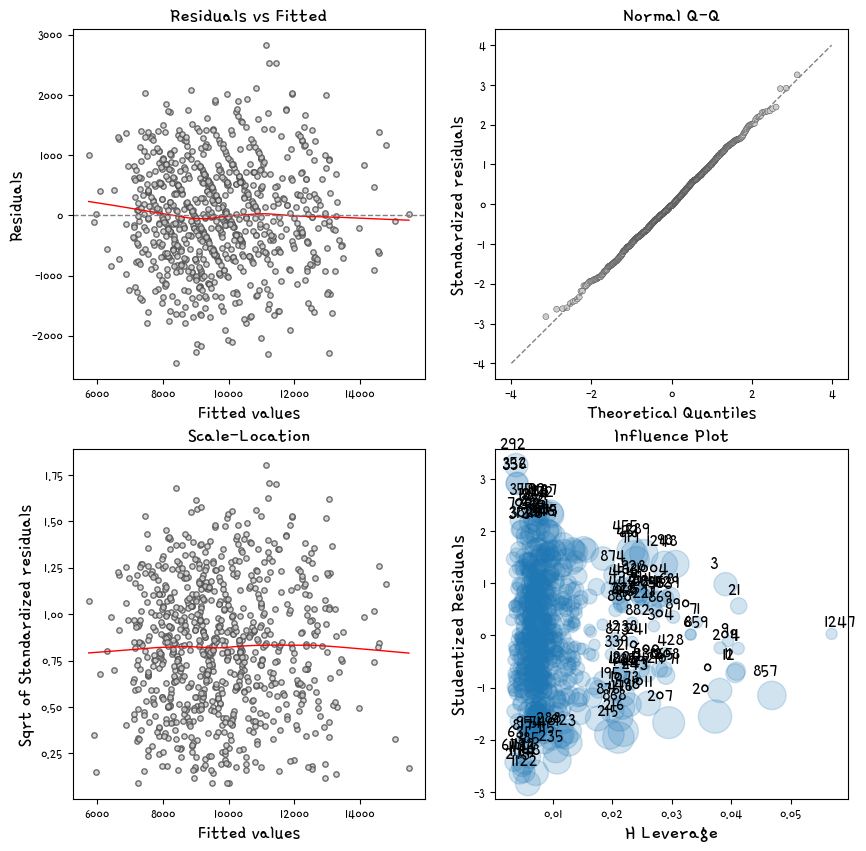

In [44]:
hds.regressionDiagnosis(model = fit2)

In [45]:
labels = ['Diesel', 'Petrol']

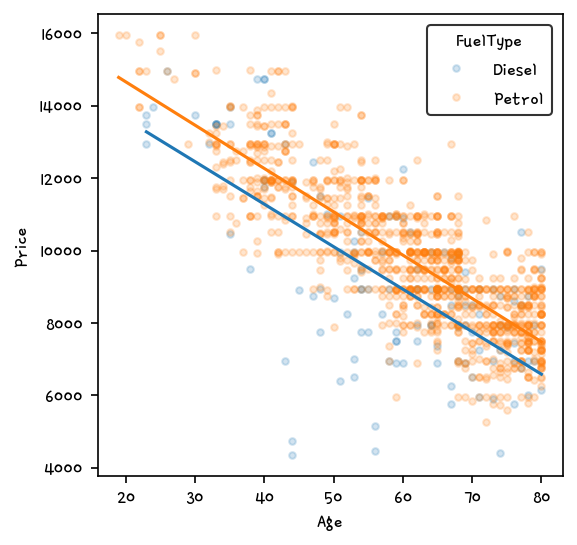

In [46]:
for i, v in enumerate(labels):
    sns.regplot(data = df[df['Petrol'].eq(i)],
                x = 'Age', 
                y = 'Price', 
                ci = None, 
                label = v, 
                scatter_kws = {'s': 10, 'alpha': 0.2},
                line_kws = {'lw': 1.5})
plt.legend(loc = 'best', title = 'FuelType');

In [47]:
trPred1 = fit1.predict(trSetX)
trPred2 = fit2.predict(trSetX)

In [48]:
pd.DataFrame(data = {'Real': trReal, 'Pred1': trPred1, 'Pred2': trPred2})

,Real,Pred1,Pred2
1116,9950,8212.688,8226.682
412,9950,10436.103,10394.200
1210,8950,9550.133,9514.326
1219,8500,7485.488,7515.104
272,11450,9529.456,9572.012
...,...,...,...
763,7750,8545.952,8566.167
835,10900,10344.563,10345.163
1216,8250,9772.273,9756.644
559,8950,9540.717,9520.295


In [49]:
tePred1 = fit1.predict(teSetX)
tePred2 = fit2.predict(teSetX)

In [50]:
pd.DataFrame(data = {'Real': teReal, 'Pred1': tePred1, 'Pred2': tePred2})

,Real,Pred1,Pred2
711,8250,8800.801,8845.335
898,6500,6284.139,6466.255
186,14350,11924.453,11947.344
867,6500,6801.433,6950.609
18,14900,14557.039,14479.869
...,...,...,...
881,7950,7299.861,7417.891
367,12950,11563.425,11546.141
608,8950,9845.690,9854.446
968,8750,8101.975,8135.850


In [51]:
hds.regmetrics(y_true = trReal, y_pred = trPred1)

,MSE,RMSE,RMSLE,MAE,MAPE
0,758864.051,871.128,0.093,700.061,0.075


In [52]:
hds.regmetrics(y_true = trReal, y_pred = trPred2)

,MSE,RMSE,RMSLE,MAE,MAPE
0,755913.113,869.433,0.093,697.674,0.075


In [53]:
hds.regmetrics(y_true = teReal, y_pred = tePred1)

,MSE,RMSE,RMSLE,MAE,MAPE
0,928775.181,963.73,0.105,759.234,0.081


In [54]:
hds.regmetrics(y_true = teReal, y_pred = tePred2)

,MSE,RMSE,RMSLE,MAE,MAPE
0,914505.621,956.298,0.103,754.909,0.081


In [55]:
hds.vif(X = trSetX)

,Age,KM,HP,MetColor,Doors,Weight,Petrol
0,1.278,1.525,3.117,1.015,1.668,4.661,6.113


In [56]:
trSetX1 = trSetX.drop(columns = ['Petrol'])

In [57]:
hds.vif(X = trSetX1)

,Age,KM,HP,MetColor,Doors,Weight
0,1.261,1.425,1.146,1.011,1.337,1.504


In [58]:
fit3 = hds.stepwise(y = trReal, X = trSetX, direction = 'both')

In [59]:
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     749.3
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          6.39e-271
Time:                        15:28:04   Log-Likelihood:                -6697.1
No. Observations:                 818   AIC:                         1.340e+04
Df Residuals:                     813   BIC:                         1.343e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4457.5787   1447.801     -3.079      0.002   -7299.448   -1615.710
Age          -95.5644      2.569    -37.193      0.000    -100.608     -90.521
KM            -0.0156      0.001    -13.326      0.000      -0.018      -0.013
Weight        18.7371      1.249     14.997      0.000      16.285      21.189
Petrol      1339.1472    169.036      7.922      0.000    1007.348    1670.946
==============================================================================
Omnibus:                        1.064   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                1.125
Skew:                           0.045   Prob(JB):                        0.570
Kurtosis:                       2.843   Cond. No.                     3.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
hds.breushpagan(model = fit3)

,Statistic,P-Value,F-Value,F P-Value
0,2.377,0.667,0.592,0.668


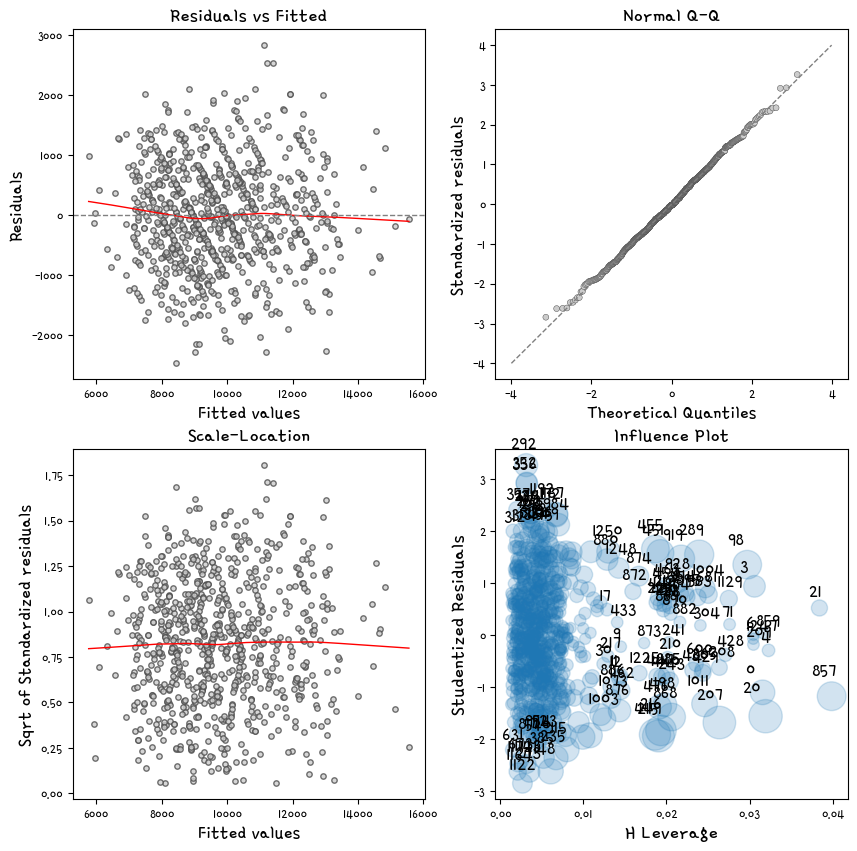

In [61]:
hds.regressionDiagnosis(model = fit3)

In [62]:
fit3.params

Intercept   -4457.579
Age           -95.564
KM             -0.016
Weight         18.737
Petrol       1339.147
dtype: float64

In [63]:
beta_z = hds.std_coefs(model = fit3)

In [66]:
beta_z.abs().sort_values()

Intercept    0.000
Petrol       0.177
KM           0.266
Weight       0.314
Age          0.680
dtype: float64

In [69]:
trPred3 = fit3.predict(exog = trSetX)
tePred3 = fit3.predict(exog = teSetX)

In [70]:
hds.regmetrics(y_true = teReal, y_pred = tePred3)

,MSE,RMSE,RMSLE,MAE,MAPE
0,911188.631,954.562,0.103,751.766,0.08


In [71]:
hds.regmetrics(y_true = teReal, y_pred = tePred2)

,MSE,RMSE,RMSLE,MAE,MAPE
0,914505.621,956.298,0.103,754.909,0.081
